In [95]:
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [120]:
np.set_printoptions(suppress=True)
X = 2*np.round(np.random.rand(1000,10),decimals=3)-1
print(X)
# Y=np.add(X[:,0:1],X[:,1:2],3*X[:,2:3]*X[:,3:4],X[:,4:5],X[:,5:6],6*X[:,5:6],7*X[:,7:8],7*X[:,8:9],8*X[:9:10])
# Y= np.add(np.add(np.add(X[:,0:1],3*X[:,1:2].*X[:,1:2],X[:,2:3]),np.add(X[:,3:4],6*X[:,4:5],7*X[:,5:6]),np.add(7*X[:,6:7],8*exp(X[:,7:8]),5*X[:,8:9])),X[:,9:10])
y1= np.add(X[:,0:1],3*X[:,1:2]*X[:,1:2],X[:,2:3])
y2 = np.add(X[:,3:4],6*X[:,4:5],7*X[:,5:6])
y3 = np.add(7*X[:,6:7],8*np.exp(X[:,7:8]),5*X[:,8:9])
y4 = X[:,9:10]
Y=np.round(np.add(np.add(y1,y2),np.add(y3,y4)),decimals=3)
print(Y)

[[ 0.566  0.168 -0.05  ... -0.046  0.404  0.634]
 [-0.5    0.948  0.336 ...  0.424  0.922 -0.404]
 [ 0.196  0.892  0.412 ... -0.932  0.97  -0.652]
 ...
 [-0.826 -0.97  -0.636 ... -0.832 -0.884  0.598]
 [-0.764 -0.278  0.292 ... -0.948 -0.736  0.052]
 [ 0.17   0.886  0.698 ... -0.364  0.652 -0.832]]
[[  9.555]
 [ 14.123]
 [  6.475]
 [ 21.909]
 [ 18.227]
 [ 14.124]
 [ 15.194]
 [  4.861]
 [ -5.462]
 [ 15.648]
 [ 16.321]
 [  6.621]
 [  6.727]
 [ -0.331]
 [ 13.047]
 [  9.981]
 [ 12.751]
 [  6.11 ]
 [ 10.128]
 [  3.184]
 [ 14.915]
 [ 11.051]
 [ 16.574]
 [  9.747]
 [  9.792]
 [  0.261]
 [  5.552]
 [ 12.943]
 [ -1.14 ]
 [ -0.692]
 [  2.914]
 [ 11.633]
 [ 14.233]
 [ 14.428]
 [  8.254]
 [ 12.994]
 [ 10.117]
 [  7.409]
 [  7.487]
 [  7.499]
 [ 13.1  ]
 [  5.679]
 [ 11.454]
 [  9.663]
 [ -0.019]
 [  6.995]
 [ 11.781]
 [ 13.135]
 [ 10.471]
 [  2.914]
 [ 16.438]
 [  0.505]
 [  7.378]
 [  6.032]
 [ 14.476]
 [ -3.646]
 [  5.394]
 [ 13.708]
 [ 14.11 ]
 [  5.547]
 [ 13.332]
 [  5.986]
 [  9.619]
 [  8.8

In [121]:
def print_network(net):
    for i,layer in enumerate(net,1):
        print("Layer {} ".format(i))
        for j,neuron in enumerate(layer,1):
            print("neuron {} :".format(j),neuron)

In [122]:
def initialize_network():
    
    input_neurons=len(X[0])
    hidden_neurons=input_neurons+1
    output_neurons=2
    
    n_hidden_layers=1
    
    net=list()
    
    for h in range(n_hidden_layers):
        if h!=0:
            input_neurons=len(net[-1])
            
        hidden_layer = [ { 'weights': np.random.uniform(size=input_neurons)} for i in range(hidden_neurons) ]
        net.append(hidden_layer)
    
    output_layer = [ { 'weights': np.random.uniform(size=hidden_neurons)} for i in range(output_neurons)]
    net.append(output_layer)
    
    return net

In [123]:
net=initialize_network()

In [124]:
def activate_sigmoid(sum):
    return (2/(1+np.exp(-sum))-1)

In [125]:
def forward_propagation(net,input):
    row=input
    for layer in net:
        prev_input=np.array([])
        for neuron in layer:
            sum=neuron['weights'].T.dot(row)
            
            result=activate_sigmoid(sum)
            neuron['result']=result
            
            prev_input=np.append(prev_input,[result])
        row =prev_input
    
    return row

In [126]:
def sigmoidDerivative(output):
    return (1.0-output*output)

In [127]:
def back_propagation(net,row,expected):
     for i in reversed(range(len(net))):
            layer=net[i]
            errors=np.array([])
            if i==len(net)-1:
                results=[neuron['result'] for neuron in layer]
                errors = expected-np.array(results) 
            else:
                for j in range(len(layer)):
                    herror=0
                    nextlayer=net[i+1]
                    for neuron in nextlayer:
                        herror+=(neuron['weights'][j]*neuron['delta'])
                    errors=np.append(errors,[herror])
            
            for j in range(len(layer)):
                neuron=layer[j]
                neuron['delta']=errors[j]*sigmoidDerivative(neuron['result'])

In [128]:
def updateWeights(net,input,lrate):
    
    for i in range(len(net)):
        inputs = input
        if i!=0:
            inputs=[neuron['result'] for neuron in net[i-1]]

        for neuron in net[i]:
            for j in range(len(inputs)):
                neuron['weights'][j]+=lrate*neuron['delta']*inputs[j]

In [ ]:
def training(net, epochs,lrate,n_outputs):
    errors=[]
    for epoch in range(epochs):
        sum_error=0
        for i,row in enumerate(X):
            outputs=forward_propagation(net,row)
            
            expected=[0.0 for i in range(n_outputs)]
            expected[0]=1
    
            sum_error+=sum([(expected[j]-outputs[j])**2 for j in range(len(expected))])
            back_propagation(net,row,expected)
            updateWeights(net,row,0.05)
        if epoch%10000 ==0:
            print('>epoch=%d,error=%.3f'%(epoch,sum_error))
            errors.append(sum_error)
    return errors

In [ ]:
errors=training(net,100000, 0.05,1)

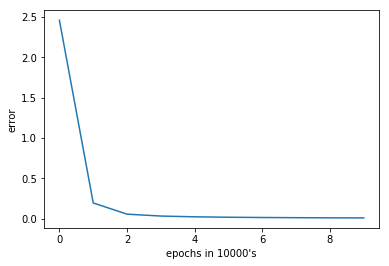

In [27]:
epochs=[0,1,2,3,4,5,6,7,8,9]
plt.plot(epochs,errors)
plt.xlabel("epochs in 10000's")
plt.ylabel('error')
plt.show()

In [28]:
def predict(network, row):
    outputs = forward_propagation(net, row)
    return outputs

In [29]:
pred=predict(net,np.array([1,0]))
output=np.argmax(pred)
print(output)

1


In [30]:
print_network(net)

Layer 1 
neuron 1 : {'weights': array([5.92324719, 5.89723818]), 'result': 0.9973306495316719, 'delta': -1.3127027677199992e-08}
neuron 2 : {'weights': array([ 7.26986803, -4.54629838]), 'result': 0.9993042804985542, 'delta': 7.484733670374758e-05}
neuron 3 : {'weights': array([-4.52702662,  7.21663221]), 'result': 0.010697113350031935, 'delta': 7.711463838392592e-05}
Layer 2 
neuron 1 : {'weights': array([-13.32621171,   9.66478196,   9.66603792]), 'result': 0.028493203078935582, 'delta': 6.677790771662238e-05}
neuron 2 : {'weights': array([13.31721183, -9.65809355, -9.65934723]), 'result': 0.9714452654401629, 'delta': -6.724675579286801e-05}
